In [75]:
import pandas as pd
import numpy as np
import scipy.stats as s

In [76]:
data = pd.read_csv("../input/kc_house_data.csv")

In [77]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [78]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [79]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [80]:
for i in data.columns[3:21]:
    print(i,s.pearsonr(data['price'], data[i]))

bedrooms (0.3083495981456383, 0.0)
bathrooms (0.5251375054139619, 0.0)
sqft_living (0.7020350546118, 0.0)
sqft_lot (0.08966086058710011, 7.972504510326147e-40)
floors (0.2567938875507184, 1.6e-322)
waterfront (0.2663694340306021, 0.0)
view (0.3972934882945043, 0.0)
condition (0.036361789128997554, 8.935654062344094e-08)
grade (0.6674342560202371, 0.0)
sqft_above (0.6055672983560783, 0.0)
sqft_basement (0.32381602071198395, 0.0)
yr_built (0.054011531494792715, 1.929872809374955e-15)
yr_renovated (0.12643379344089295, 1.0213478858043326e-77)
zipcode (-0.05320285429832561, 5.011050503318762e-15)
lat (0.3070034799952186, 0.0)
long (0.021626241039305872, 0.0014750922063201787)
sqft_living15 (0.585378903579568, 0.0)
sqft_lot15 (0.08244715251948598, 6.417559889335015e-34)


In [81]:
y=data['price']
x=data[['bedrooms','bathrooms','sqft_living','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.001)

In [84]:
model = LinearRegression()
model.fit(x_train,y_train)
a = model.predict(x_test)

print(mean_absolute_error(y_test,a))
print(r2_score(y_test,a))

160610.77500799924
0.3750365020154689


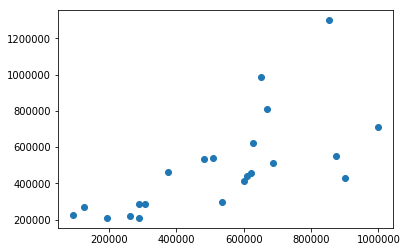

In [85]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(a,y_test)

plt.show()